# 1. 구글 비전 API 설치
- (COLAB) 설치 후 런타임 다시 시작

In [ ]:
!pip install --upgrade google-cloud-vision

     |████████████████████████████████| 370 kB 15.1 MB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 
     |████████████████████████████████| 95 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 37.1 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-translate 1.5.0 requires google-api-core[grpc]<2.0.0dev,>=1.6.0, but you have google-api-core 2.2.2 which is incompatible.
google-cloud-language 1.2.0 requires google-api-core[grpc]<2.0.0dev,>=1.6.0, but you have google-api-core 2

# 2. 사용 패키지

In [ ]:
import io
import os
import numpy as np
import pandas as pd
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
from google.colab import drive
from google.cloud import vision

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


# 3. 데이터 로드

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/08.GoogleVisionAPI/data'
model = load_model(PATH + '/' + 'CNN.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        0

# 4. 구글 비전 API KEY

In [ ]:
jsonfile = list(files.upload().keys())[0]
jsonfile

Saving API_KEY.json to API_KEY.json


'API_KEY.json'

In [ ]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = jsonfile

# 5. 객체 인식

## 1) 구글 비전 API

Saving test.png to test.png


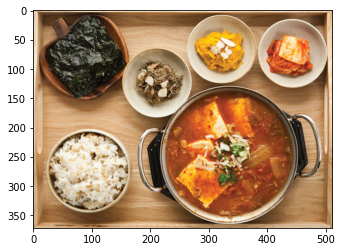

In [ ]:
file_name = list(files.upload().keys())[0]
plt.imshow(Image.open(file_name))
plt.show()

In [ ]:
client = vision.ImageAnnotatorClient()
with open(file_name, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content = content)
objects = client.object_localization(image = image).localized_object_annotations
print('Number of objects found : {}'.format(len(objects)))
df = pd.DataFrame(columns = ['name', 'confidence', 'x', 'y'])
for object_ in objects:
    print('\n{} (confidence : {})'.format(object_.name, object_.score))
    print('Normalized bounding polygon vertices : ')
    x, y = [], []
    for vertex in object_.bounding_poly.normalized_vertices:
        print(' - ({}, {})'.format(vertex.x, vertex.y))
        x.append(vertex.x)
        y.append(vertex.y)
    new_data = {'name' : object_.name, 'confidence' : object_.score, 'x' : x, 'y' : y}
    df = df.append(new_data, ignore_index = True)

Number of objects found : 8

Food (confidence : 0.769819438457489)
Normalized bounding polygon vertices : 
 - (0.04487704858183861, 0.5435435175895691)
 - (0.32455068826675415, 0.5435435175895691)
 - (0.32455068826675415, 0.9215154051780701)
 - (0.04487704858183861, 0.9215154051780701)

Food (confidence : 0.7662439346313477)
Normalized bounding polygon vertices : 
 - (0.36182162165641785, 0.3358001410961151)
 - (0.9499009847640991, 0.3358001410961151)
 - (0.9499009847640991, 0.9842813014984131)
 - (0.36182162165641785, 0.9842813014984131)

Food (confidence : 0.762057363986969)
Normalized bounding polygon vertices : 
 - (0.028026985004544258, 0.01991940662264824)
 - (0.3185824453830719, 0.01991940662264824)
 - (0.3185824453830719, 0.4138568639755249)
 - (0.028026985004544258, 0.4138568639755249)

Food (confidence : 0.7500367164611816)
Normalized bounding polygon vertices : 
 - (0.5098152160644531, 0.031969595700502396)
 - (0.7377073168754578, 0.031969595700502396)
 - (0.7377073168754578

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        8 non-null      object 
 1   confidence  8 non-null      float64
 2   x           8 non-null      object 
 3   y           8 non-null      object 
dtypes: float64(1), object(3)
memory usage: 384.0+ bytes


In [ ]:
df.head()

,name,confidence,x,y
0,Food,0.769819,"[0.04487704858183861, 0.32455068826675415, 0.3...","[0.5435435175895691, 0.5435435175895691, 0.921..."
1,Food,0.766244,"[0.36182162165641785, 0.9499009847640991, 0.94...","[0.3358001410961151, 0.3358001410961151, 0.984..."
2,Food,0.762057,"[0.028026985004544258, 0.3185824453830719, 0.3...","[0.01991940662264824, 0.01991940662264824, 0.4..."
3,Food,0.750037,"[0.5098152160644531, 0.7377073168754578, 0.737...","[0.031969595700502396, 0.031969595700502396, 0..."
4,Food,0.748438,"[0.30014273524284363, 0.5335497260093689, 0.53...","[0.16922257840633392, 0.16922257840633392, 0.4..."


## 2) 객체 인식

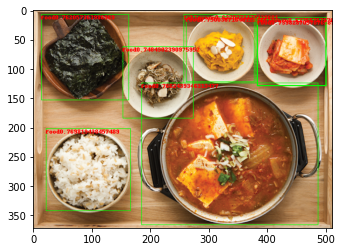

In [ ]:
def draw_rect(image, point1, point2):
    draw = ImageDraw.Draw(image)
    draw.rectangle((point1, point2), outline = (0, 255, 0), width = 1)
    draw.text(point1, label, fill = 'red')
    return image
image = Image.open(file_name)
w, h = image.size
for i in range(len(df)):
    label = df.name[i] + str(df.confidence[i])
    x = df.x[i]
    y = df.y[i]
    image = draw_rect(image, (w * min(x), h * min(y)), (w * max(x), h * max(y)))
plt.imshow(np.array(image))
plt.show()

## 3) 이미지 잘라내기

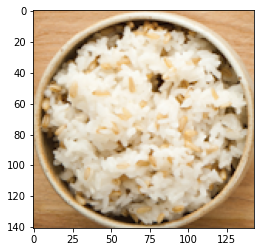

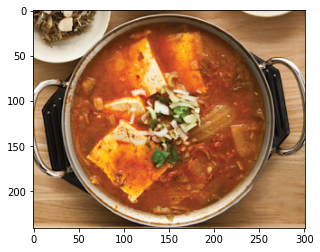

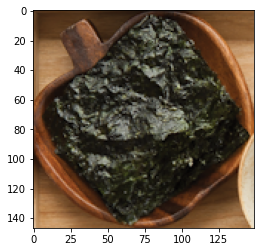

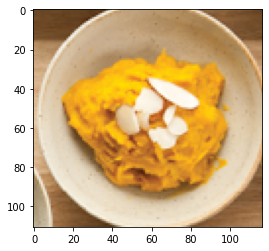

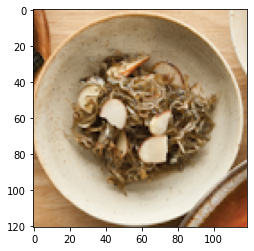

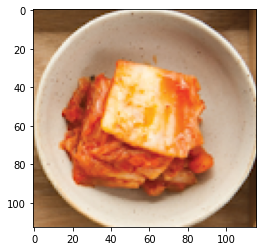

In [ ]:
image = Image.open(file_name)
w, h = image.size
for i in range(len(df)):
    x = df.x[i]
    y = df.y[i]
    crop_img = image.crop((w * min(x), h * min(y), w * max(x), h * max(y)))
    if df.name[i] == 'Food':
        plt.imshow(np.array(crop_img))
        plt.show()
    elif df.name[i] == 'Bowl':
        plt.imshow(np.array(crop_img))
        plt.show()

# 6. 예측
- 갈비구이 : 0
- 갈비찜 : 1
- 갈치조림 : 2
- 계란말이 : 3
- 고등어구이 : 4
- 김밥 : 5
- 김치찌개 : 6
- 닭갈비 : 7
- 닭볶음탕 : 8
- 떡볶이 : 9
- 라면 : 10
- 만두 : 11
- 미역국 : 12
- 배추김치 : 13
- 보쌈 : 14
- 불고기 : 15
- 비빔밥 : 16
- 삼겹살 : 17
- 삼계탕 : 18
- 양념치킨 : 19
- 육개장 : 20
- 잡채 : 21
- 제육볶음 : 22
- 족발 : 23
- 짜장면 : 24
- 짬뽕 : 25
- 파전 : 26
- 후라이드치킨 : 27

In [ ]:
def food_pred(file_name):
    img = file_name
    img = img.convert('RGB')
    img = img.resize((64, 64))
    imgarr = np.array(img) / 255
    imgarr = [imgarr,]
    imgarr = np.array(imgarr, dtype = 'float32')
    pred = model.predict(imgarr)
    class_names = ['갈비구이', '갈비찜', '갈치조림', '계란말이', '고등어구이',
                   '김밥', '김치찌개', '닭갈비', '닭볶음탕', '떡볶이',
                   '라면', '만두', '미역국', '배추김치', '보쌈',
                   '불고기', '비빔밥', '삼겹살', '삼계탕', '양념치킨',
                   '육개장', '잡채', '제육볶음', '족발', '짜장면',
                   '짬뽕', '파전', '후라이드치킨']
    for i in pred:
        print(np.argmax(i), class_names[np.argmax(i)])

In [ ]:
image = Image.open(file_name)
w, h = image.size
for i in range(len(df)):
    x = df.x[i]
    y = df.y[i]
    crop_img = image.crop((w * min(x), h * min(y), w * max(x), h * max(y)))
    img = crop_img
    if df.name[i] == 'Food':
        food_pred(img)
    elif df.name[i] == 'Bowl':
        food_pred(img)

11 만두
6 김치찌개
5 김밥
3 계란말이
12 미역국
13 배추김치
